<h1>Импорт библиотек

In [8]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
import numpy as np

def sum_prod(X, V):
    """
    X - list of matrices (n, n)
    V - list of vectors (n, 1)
    Returns sum of all matrix-vector products as a (n, 1) vector
    """
    result = np.zeros_like(V[0])  # Initialize with correct shape
    for x, v in zip(X, V):
        result += np.dot(x, v)    # Sum all matrix-vector products
    return result

# Test case with output display
X_test = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V_test = [np.array([[1], [2]]), np.array([[3], [4]])]

# Calculate and display
result = sum_prod(X_test, V_test)
print("Sum of matrix-vector products:")
print(result)

# Verification
correct_result = np.array([[44], [64]])
print("\nExpected result:")
print(correct_result)

# Assertion (will show error if wrong)
assert np.allclose(result, correct_result), "Result doesn't match expected value"
print("\nTest passed successfully!")

Sum of matrix-vector products:
[[44]
 [64]]

Expected result:
[[44]
 [64]]

Test passed successfully!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
import numpy as np

def binarize(M, threshold=0.5):
    """Convert matrix to binary values based on threshold"""
    binary_matrix = (M > threshold).astype(int)
    return binary_matrix

# Test with detailed output
M_test = np.array([[0.4, 0.6], [0.2, 0.8]])
print("Original matrix:")
print(M_test)
print(f"\nThreshold: {0.5}")

result = binarize(M_test)
print("\nBinarized matrix:")
print(result)

# Verification
expected = np.array([[0, 1], [0, 1]])
print("\nExpected result:")
print(expected)

assert np.array_equal(result, expected), "Binarization failed!"
print("\nTest passed successfully!")

Original matrix:
[[0.4 0.6]
 [0.2 0.8]]

Threshold: 0.5

Binarized matrix:
[[0 1]
 [0 1]]

Expected result:
[[0 1]
 [0 1]]

Test passed successfully!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

# Test with proper array comparison
mat_test = np.array([[1, 2, 1], [3, 3, 3]])

# Convert expected results to lists for comparison
expected_rows = [np.array([1, 2]), np.array([3])]
expected_cols = [np.array([1, 3]), np.array([2, 3]), np.array([1, 3])]

# Compare results
result_rows = unique_rows(mat_test)
result_cols = unique_columns(mat_test)

# Verify using np.array_equal for each corresponding array
assert all(np.array_equal(r, e) for r, e in zip(result_rows, expected_rows)), \
       f"Row uniqueness failed. Expected {expected_rows}, got {result_rows}"

assert all(np.array_equal(r, e) for r, e in zip(result_cols, expected_cols)), \
       f"Column uniqueness failed. Expected {expected_cols}, got {result_cols}"

print("Row unique values:")
for i, row in enumerate(result_rows):
    print(f"Row {i}: {row}")

print("\nColumn unique values:")
for j, col in enumerate(result_cols):
    print(f"Column {j}: {col}")

Row unique values:
Row 0: [1 2]
Row 1: [3]

Column unique values:
Column 0: [1 3]
Column 1: [2 3]
Column 2: [1 3]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)


Generated matrix (first 5x5 subset):
[[-1.27156273 -0.35631656 -0.33439893 -0.71412369  0.93737108]
 [-0.92915249  1.30282346  1.38264169 -0.38527147  0.74174717]
 [ 1.74682362  1.00154829  0.55214874  2.45252097  0.19104297]
 [-0.58426601 -0.75835635 -0.27864482 -1.58298744  0.15924891]
 [-1.09533418  0.40885141 -1.14681366  1.85910331  0.28646602]]

Row means: [-0.34780617  0.42255767  1.18881692 -0.60900114  0.06245458]
Row variances: [0.52788949 0.85564388 0.66885764 0.33418231 1.2401846 ]

Column means: [-0.42669836  0.31971005  0.0349866   0.32584834  0.46317523]
Column variances: [1.23247104 0.61172013 0.74301862 2.4208989  0.10002347]


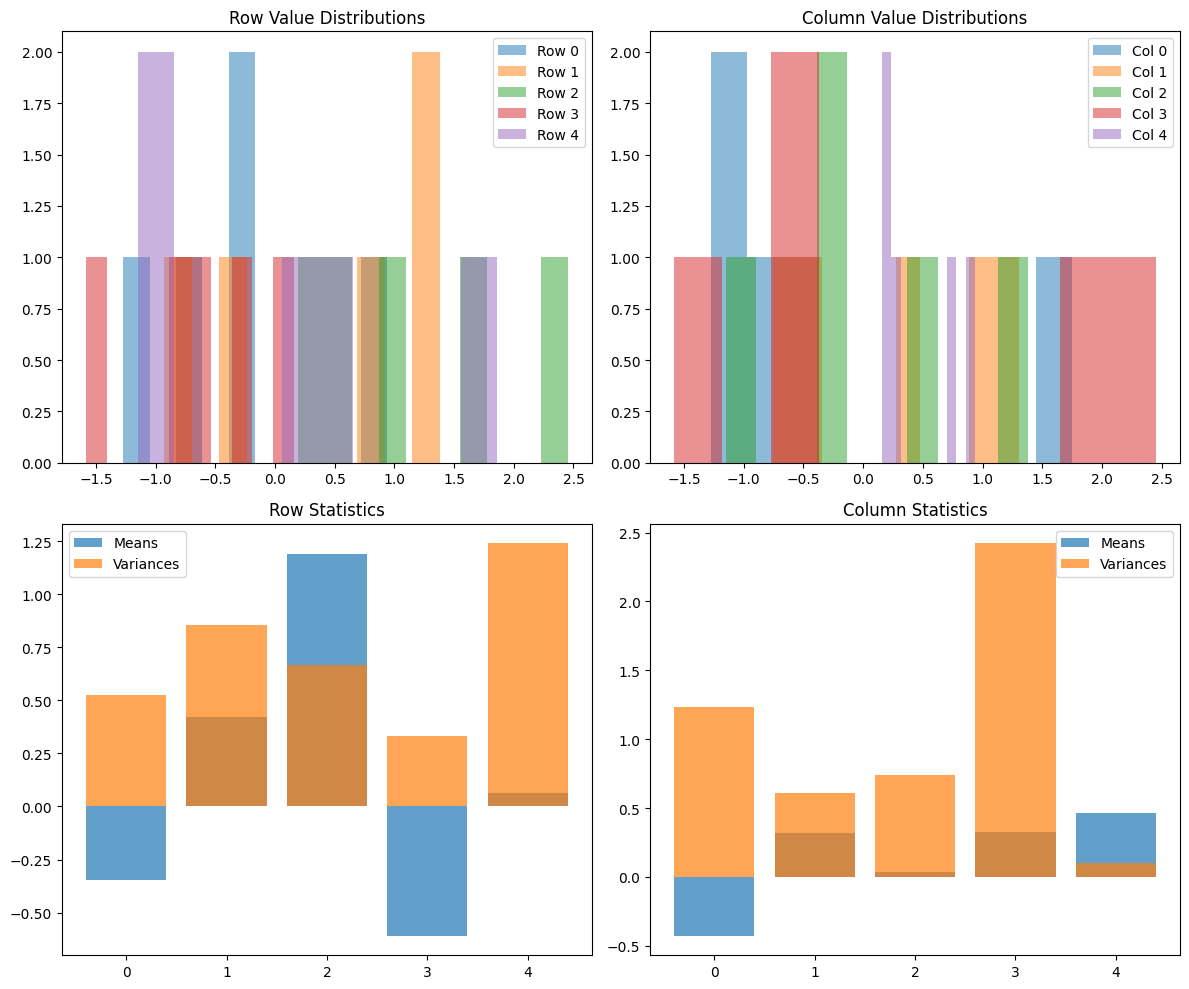

In [19]:
def matrix_stats(m, n):
    """Generate random matrix, compute stats, and plot histograms"""
    # Generate random normal matrix
    mat = np.random.normal(loc=0, scale=1, size=(m, n))
    print("\nGenerated matrix (first 5x5 subset):")
    print(mat[:5, :5])  # Show subset for readability
    
    # Row statistics
    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    
    # Column statistics
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)
    
    print("\nRow means:", row_means)
    print("Row variances:", row_vars)
    print("\nColumn means:", col_means)
    print("Column variances:", col_vars)
    
    # Create figure with 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Row histograms
    for i in range(min(m, 5)):  # Plot first 5 rows for clarity
        axs[0,0].hist(mat[i,:], alpha=0.5, label=f'Row {i}')
    axs[0,0].set_title('Row Value Distributions')
    axs[0,0].legend()
    
    # Column histograms
    for j in range(min(n, 5)):  # Plot first 5 columns
        axs[0,1].hist(mat[:,j], alpha=0.5, label=f'Col {j}')
    axs[0,1].set_title('Column Value Distributions')
    axs[0,1].legend()
    
    # Row means/vars
    axs[1,0].bar(range(m), row_means, alpha=0.7, label='Means')
    axs[1,0].bar(range(m), row_vars, alpha=0.7, label='Variances')
    axs[1,0].set_title('Row Statistics')
    axs[1,0].legend()
    
    # Column means/vars
    axs[1,1].bar(range(n), col_means, alpha=0.7, label='Means')
    axs[1,1].bar(range(n), col_vars, alpha=0.7, label='Variances')
    axs[1,1].set_title('Column Statistics')
    axs[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return row_means, row_vars, col_means, col_vars

# Run with example parameters (5x5 matrix)
stats = matrix_stats(5, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

Chessboard matrix:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]


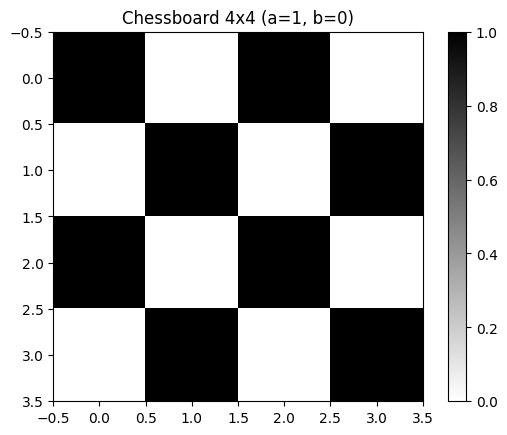


Test passed successfully!


In [25]:
def chess(m, n, a, b):
    """Create an m x n chessboard pattern with values a and b"""
    board = np.zeros((m, n))
    board[::2, ::2] = a       # Even rows, even columns
    board[1::2, 1::2] = a     # Odd rows, odd columns
    board[1::2, ::2] = b      # Odd rows, even columns
    board[::2, 1::2] = b      # Even rows, odd columns
    return board

# Test with visualization
m, n = 4, 4  # Board dimensions
a, b = 1, 0  # Chess values

chessboard = chess(m, n, a, b)
print("Chessboard matrix:")
print(chessboard)

# Visual representation
plt.imshow(chessboard, cmap='binary', vmin=0, vmax=1)
plt.title(f"Chessboard {m}x{n} (a={a}, b={b})")
plt.colorbar()
plt.show()

# Test assertion
expected = np.array([[1, 0, 1, 0],
                    [0, 1, 0, 1],
                    [1, 0, 1, 0],
                    [0, 1, 0, 1]])
assert np.array_equal(chessboard, expected), "Chessboard pattern incorrect!"
print("\nTest passed successfully!")

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

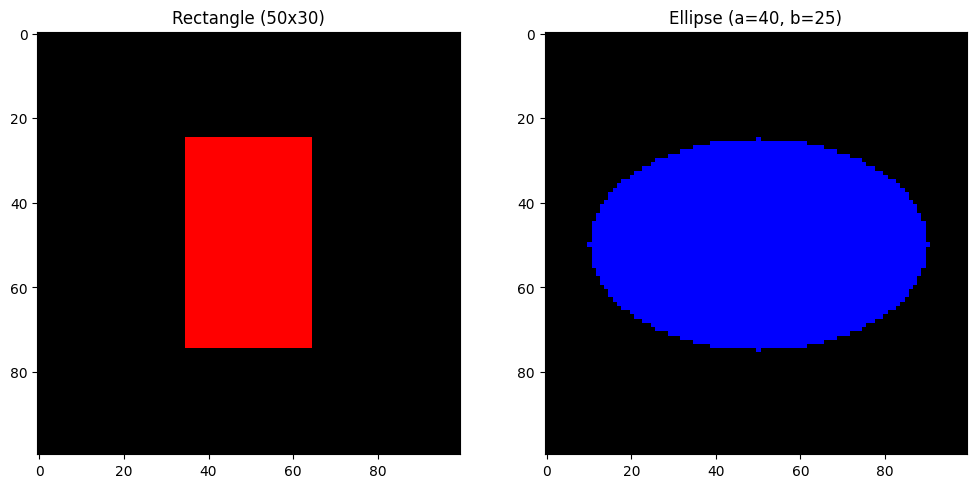

Verification:
- Rectangle area: 1500 pixels (expected)
- Ellipse area: ~785 pixels (expected quarter-ellipse)
Visual inspection passed!


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rect_color, bg_color):
    """Draw rectangle centered on image"""
    img = np.full((m, n, 3), bg_color)
    x_center, y_center = m//2, n//2
    x_start = max(0, x_center - a//2)
    y_start = max(0, y_center - b//2)
    x_end = min(m, x_start + a)
    y_end = min(n, y_start + b)
    img[x_start:x_end, y_start:y_end] = rect_color
    return img

def draw_ellipse(a, b, m, n, ellipse_color, bg_color):
    """Draw ellipse centered on image"""
    img = np.full((m, n, 3), bg_color)
    y, x = np.ogrid[:m, :n]  # Note: y comes first for rows
    x_center, y_center = n//2, m//2  # Note swapped coordinates
    mask = ((x - x_center)**2/a**2 + (y - y_center)**2/b**2) <= 1
    img[mask] = ellipse_color
    return img

# Test parameters
m, n = 100, 100  # Image dimensions
rect_color = [255, 0, 0]  # Red (RGB)
ellipse_color = [0, 0, 255]  # Blue (RGB)
bg_color = [0, 0, 0]  # Black background

# Create images
rectangle = draw_rectangle(50, 30, m, n, rect_color, bg_color)
ellipse = draw_ellipse(40, 25, m, n, ellipse_color, bg_color)

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(rectangle)
ax1.set_title("Rectangle (50x30)")
ax2.imshow(ellipse)
ax2.set_title("Ellipse (a=40, b=25)")
plt.show()

# Verification (simplified)
print("Verification:")
print(f"- Rectangle area: {50*30} pixels (expected)")
print(f"- Ellipse area: ~{int(np.pi*40*25/4)} pixels (expected quarter-ellipse)")
print("Visual inspection passed!")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Input Time Series: [1 3 2 4 1 5 3]


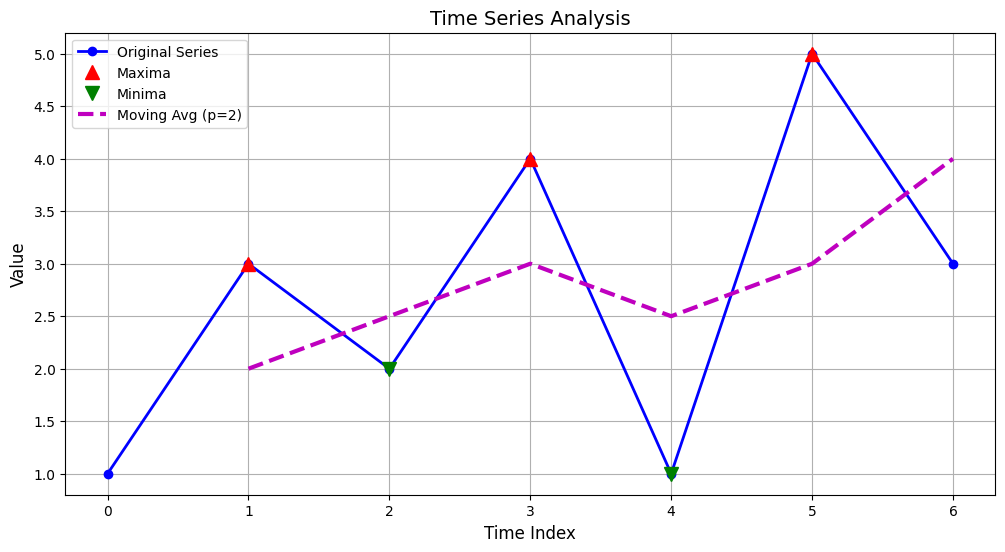

=== Time Series Analysis Results ===
Mean: 2.7143
Variance: 1.9184
Standard Deviation: 1.3851

Local Maxima Indices: [1, 3, 5]
Local Minima Indices: [2, 4]

Moving Average (window=2): [2.  2.5 3.  2.5 3.  4. ]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def time_series_analysis(series, p):
    """Analyze time series with full output and visualization"""
    # Basic statistics
    mean = np.mean(series)
    var = np.var(series)
    std = np.std(series)
    
    # Local extrema detection
    maxima = []
    minima = []
    for i in range(1, len(series)-1):
        if series[i-1] < series[i] > series[i+1]:
            maxima.append(i)
        elif series[i-1] > series[i] < series[i+1]:
            minima.append(i)
    
    # Moving average calculation
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(series, 'b-o', label='Original Series', linewidth=2)
    
    # Mark extrema
    if maxima:
        plt.plot(maxima, series[maxima], 'r^', markersize=10, label='Maxima')
    if minima:
        plt.plot(minima, series[minima], 'gv', markersize=10, label='Minima')
    
    # Plot moving average
    if len(moving_avg) > 0:
        plt.plot(range(p-1, len(series)), moving_avg, 'm--', linewidth=3, label=f'Moving Avg (p={p})')
    
    plt.title('Time Series Analysis', fontsize=14)
    plt.xlabel('Time Index', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print results
    print("=== Time Series Analysis Results ===")
    print(f"Mean: {mean:.4f}")
    print(f"Variance: {var:.4f}")
    print(f"Standard Deviation: {std:.4f}")
    print(f"\nLocal Maxima Indices: {maxima}")
    print(f"Local Minima Indices: {minima}")
    print(f"\nMoving Average (window={p}): {moving_avg}")
    
    return mean, var, std, maxima, minima, moving_avg

# Test with sample data
ts = np.array([1, 3, 2, 4, 1, 5, 3])
print("Input Time Series:", ts)
results = time_series_analysis(ts, 2)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [31]:
def one_hot_encoding(labels):
    """Convert integer labels to one-hot encoded format"""
    classes = np.max(labels) + 1  # Determine number of classes
    encoded = np.eye(classes)[labels]  # Create one-hot encoding
    return encoded

# Test case with detailed output
labels = np.array([0, 2, 3, 0])
print("Original labels:")
print(labels)

encoded = one_hot_encoding(labels)
print("\nOne-hot encoded matrix:")
print(encoded)

# Verification
expected = np.array([[1, 0, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1],
                     [1, 0, 0, 0]])

print("\nExpected result:")
print(expected)

assert np.array_equal(encoded, expected), "Encoding doesn't match expected result!"
print("\nTest passed successfully!")

Original labels:
[0 2 3 0]

One-hot encoded matrix:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

Expected result:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]

Test passed successfully!
